<h4>PRODIGY INFOTECH INTERNSHIP </h4>

<h5>TASK-2 EXPLORATORY DATA ANALYSIS ON TITANIC DATA</h5>

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#no.of rows and columns in the dataset
print("shape of the dataset:",df.shape,"\n")
# Checking the data types of the columns
print("Data types of the columns:",df.dtypes,"\n")
#sum of the null values in each column
print("Sum of the null values in the dataset:\n",df.isnull().sum())

shape of the dataset: (891, 12) 

Data types of the columns: PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object 

Sum of the null values in the dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
#there are a lot of empty entries in the cabin column so let's drop it.
df.drop(columns='Cabin')
#lets use mean() for filling thr missing values in the column Age
df['Age'].fillna(df['Age'].mean(),inplace=True)
#lets use mode() for filling thr missing values in the column fare
df['Embarked'].fillna(df['Embarked'].mode(),inplace=True)

In [9]:
# Finding the number of people survived and not survived
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

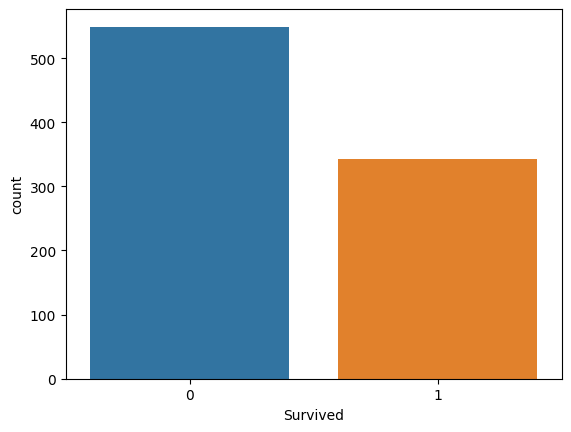

In [10]:
# Graphical representation of Survived column
sns.countplot(x='Survived', data=df)

In [11]:
# Number of males and females in Titanic
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

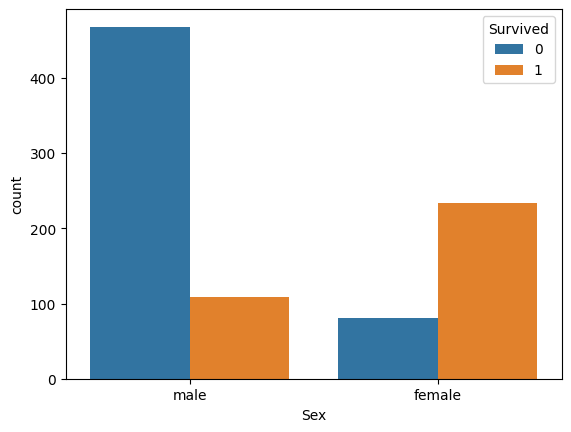

In [12]:
# Graphical representation of Survied based on Gender
sns.countplot(x='Sex', hue='Survived', data=df)

In [13]:
# Number of passengers in each passenger class
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

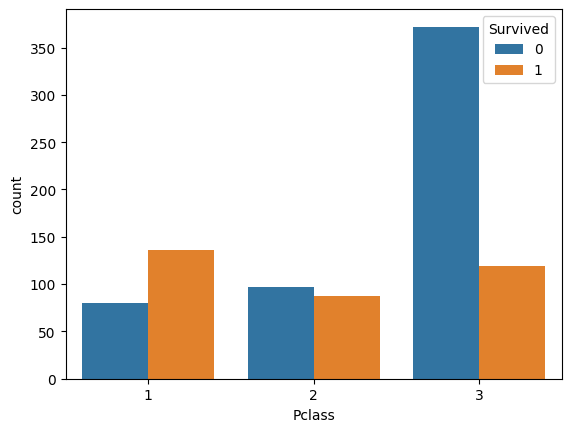

In [14]:
# Graphical representation of Survived based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=df)

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


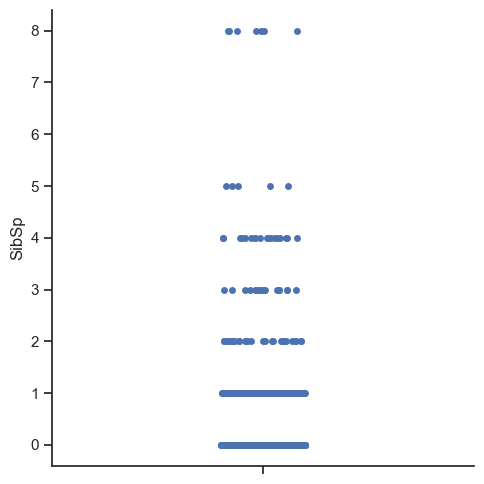

In [24]:
print(df['SibSp'].value_counts())

sns.catplot(df['SibSp'])

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


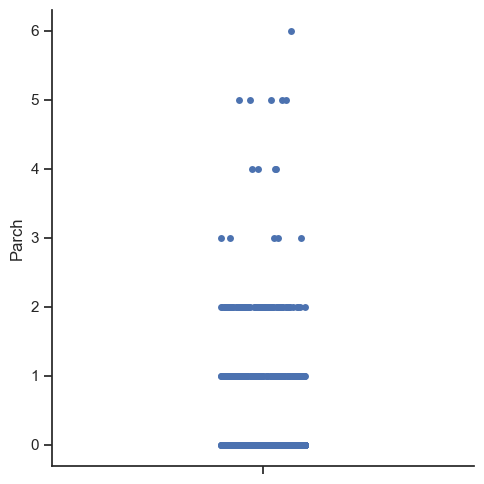

In [26]:
print((df['Parch'].value_counts()/891)*100)

sns.catplot(df['Parch'])

In [15]:
# Converting the categorical columns
df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':1, 'C':2, 'Q':3}}, inplace=True)

C:\Users\kowsh\AppData\Local\Temp\ipykernel_7336\2163057983.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Embarked', y='Survived', ci=None)


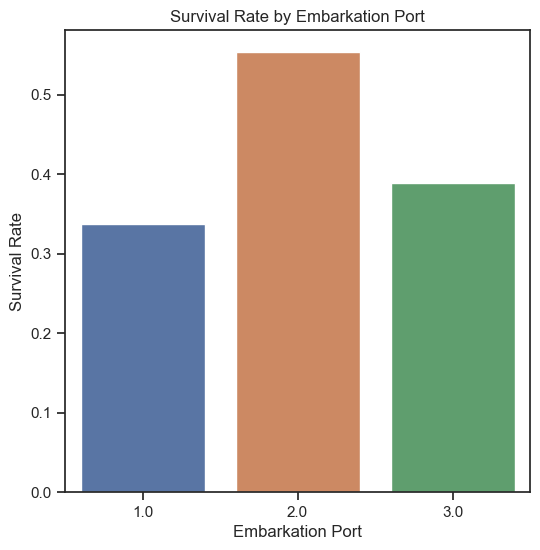

In [27]:
# Visualize the survival rate based on embarkation port
plt.figure(figsize=(6, 6))
sns.barplot(data=df, x='Embarked', y='Survived', ci=None)
plt.title('Survival Rate by Embarkation Port')
plt.xlabel('Embarkation Port')
plt.ylabel('Survival Rate')
plt.show()

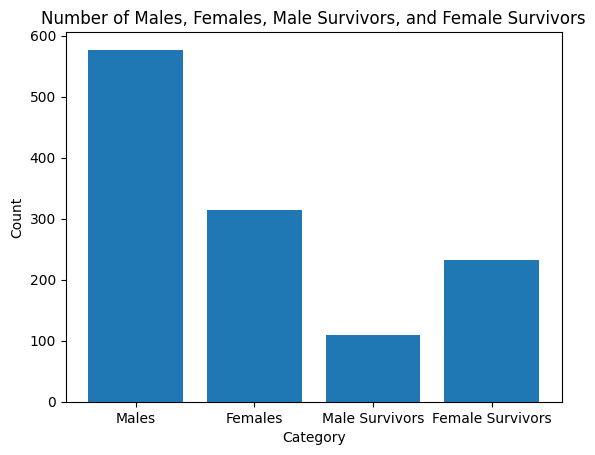

Number of males: 577
Number of females: 314
Number of male survivors: 109
Number of female survivors: 233


In [16]:
# Count the number of males and females
male_count = df[df['Sex'] == 0].shape[0]
female_count = df[df['Sex'] == 1].shape[0]

# Count the number of male survivors and female survivors
male_survivors = len(df[(df['Sex'] == 0) & (df['Survived'] == 1)])
female_survivors = len(df[(df['Sex'] == 1) & (df['Survived'] == 1)])

labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [male_count, female_count, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

# Print the results
print("Number of males:", male_count)
print("Number of females:", female_count)
print("Number of male survivors:", male_survivors)
print("Number of female survivors:", female_survivors)

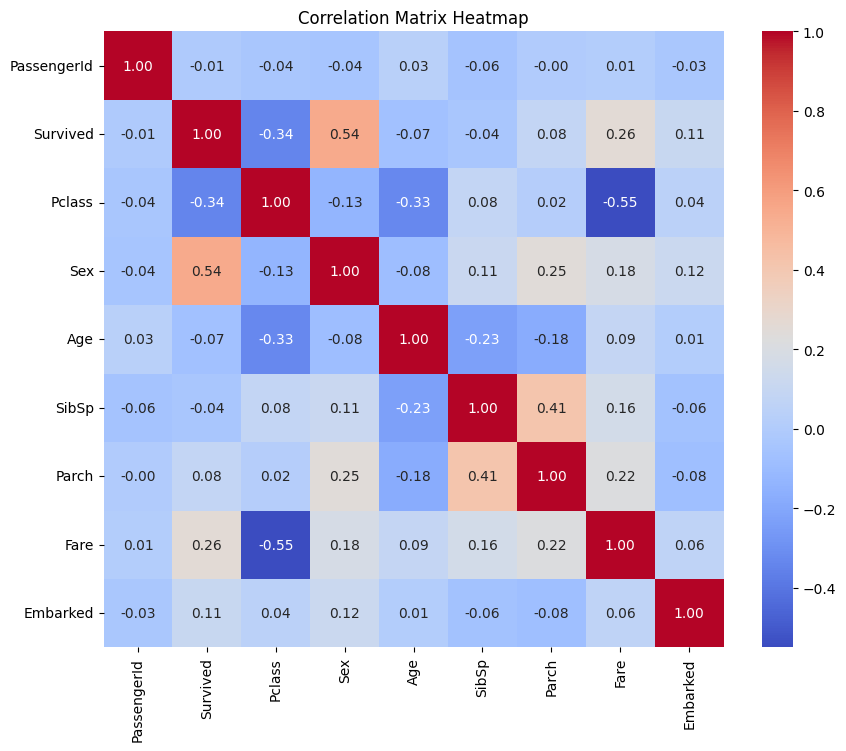

In [17]:
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

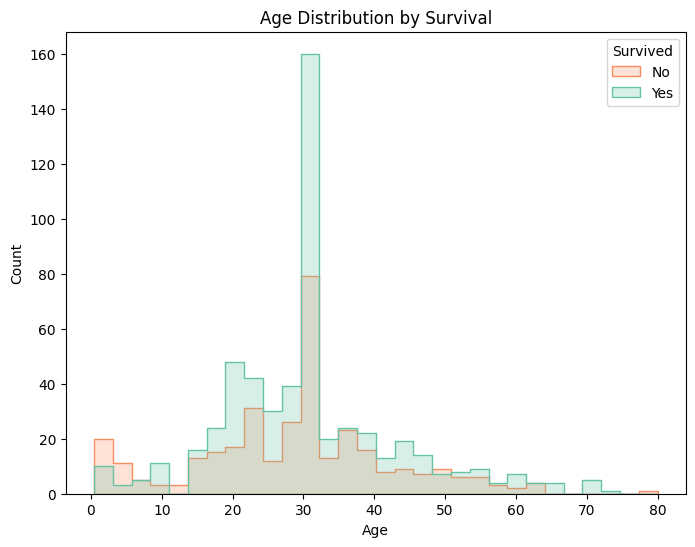

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', element='step', common_norm=False, palette='Set2')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

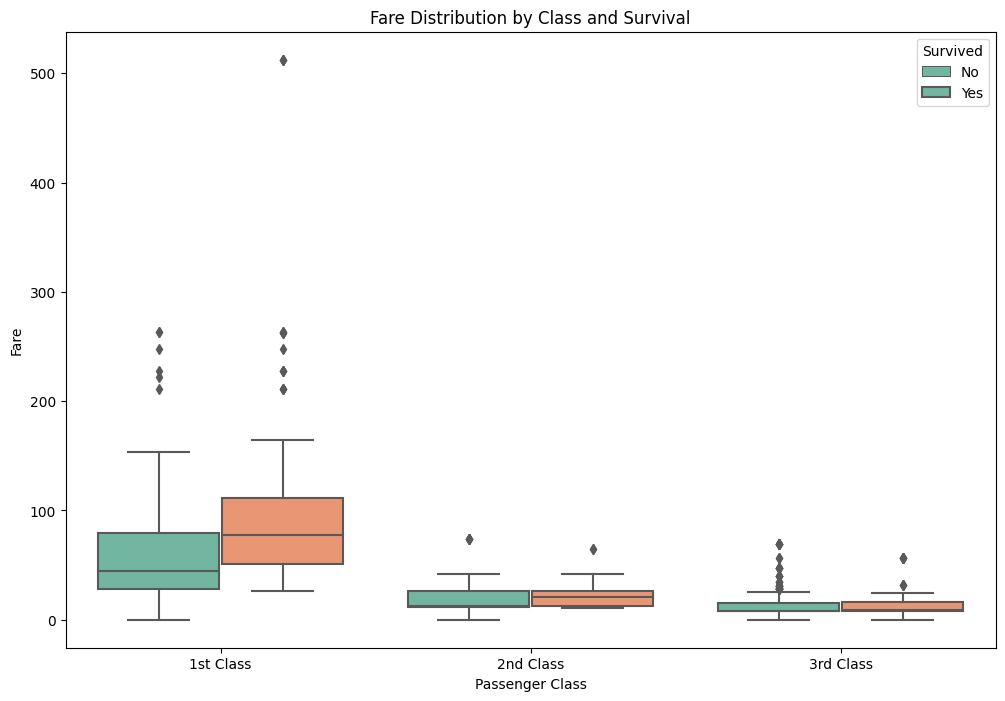

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set2')
plt.title('Fare Distribution by Class and Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

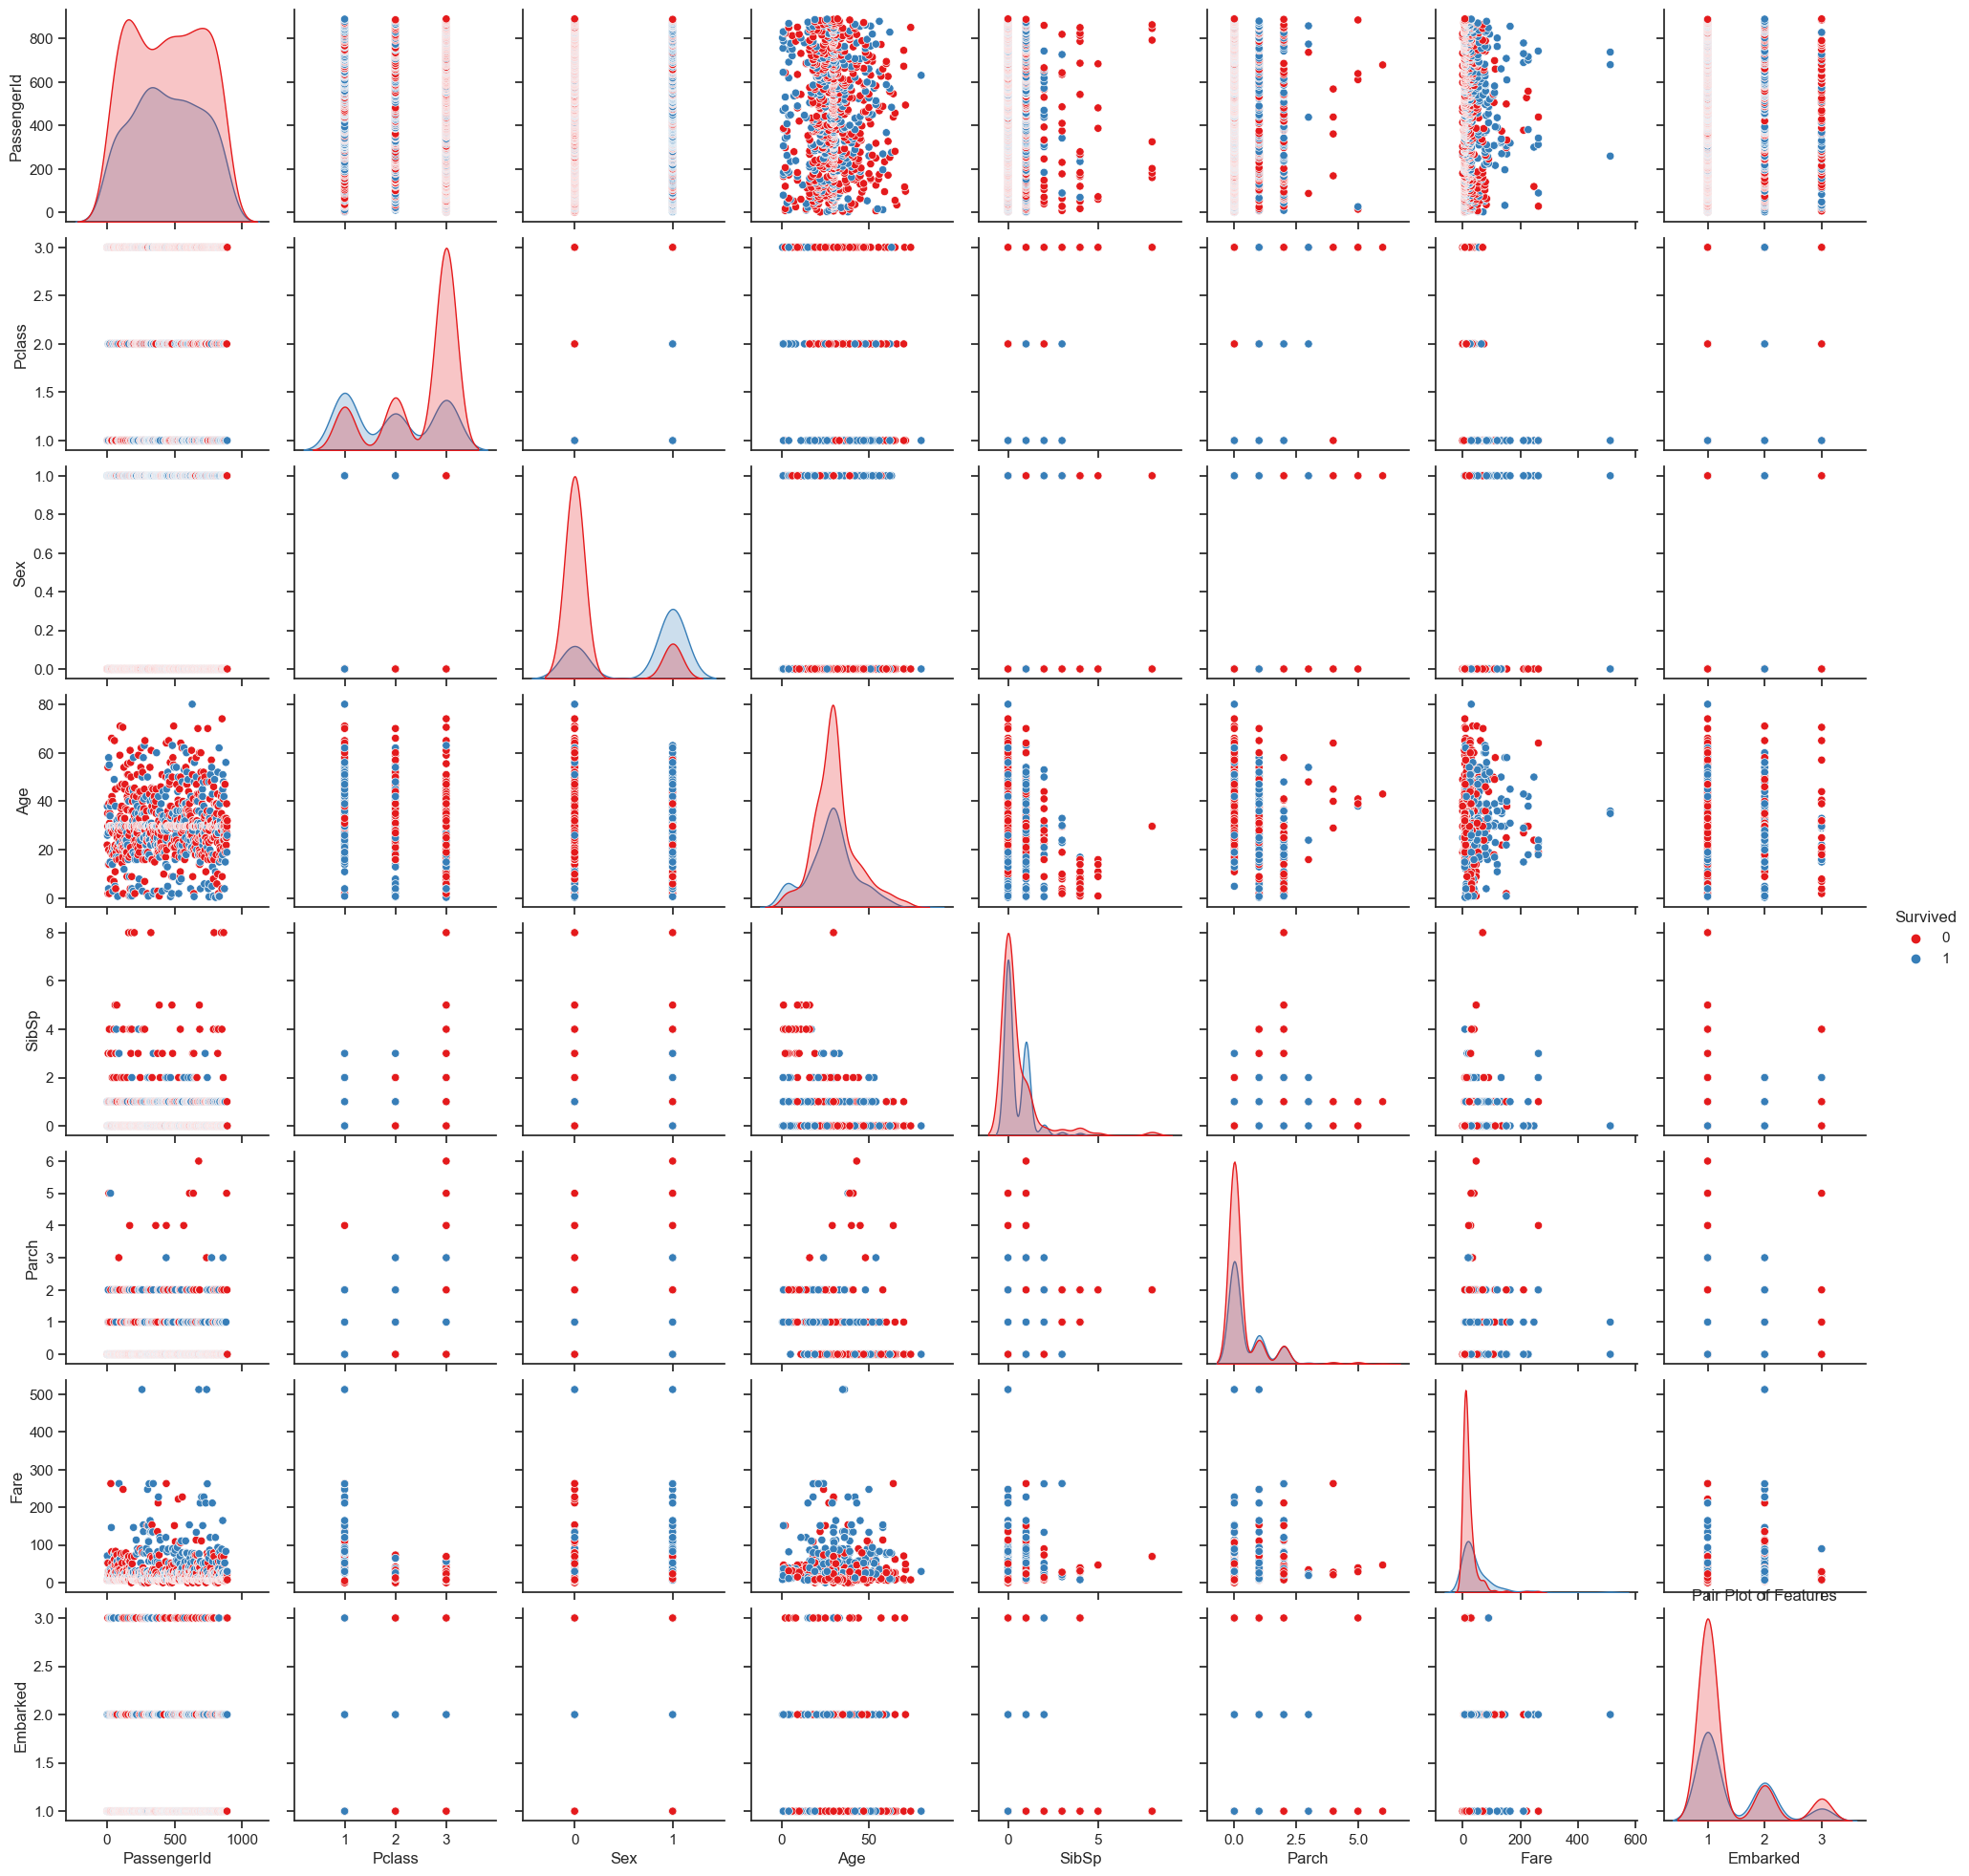

In [20]:
sns.set(style="ticks")
sns.pairplot(data=df, hue='Survived', palette='Set1')
plt.title('Pair Plot of Features')
plt.show()